# 4.	Case Study on Real Data

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from pandas.plotting import table
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold

## 4.1	PHM08 Prognostics Data Challenge Dataset

## 4.2	Data Exploration and Preparation

### 4.2.1	Data Exploration

In [5]:
index_col_names=['Unit','Cycle']
operat_set_col_names=['OpSet{}'.format(i) for i in range(1,4)]
sensor_measure_col_names=['SM{}'.format(i) for i in range(1,22)]
all_col=index_col_names+operat_set_col_names+sensor_measure_col_names
print(all_col)

['Unit', 'Cycle', 'OpSet1', 'OpSet2', 'OpSet3', 'SM1', 'SM2', 'SM3', 'SM4', 'SM5', 'SM6', 'SM7', 'SM8', 'SM9', 'SM10', 'SM11', 'SM12', 'SM13', 'SM14', 'SM15', 'SM16', 'SM17', 'SM18', 'SM19', 'SM20', 'SM21']


In [6]:
train_df=pd.read_csv('/Users/qing/Desktop/Masterarbeit/内容/Code/4.PHM08data/train_FD001.txt',delim_whitespace=True,names=all_col)
train_df

,Unit,Cycle,OpSet1,OpSet2,OpSet3,SM1,SM2,SM3,SM4,SM5,...,SM12,SM13,SM14,SM15,SM16,SM17,SM18,SM19,SM20,SM21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,519.49,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,519.68,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,520.01,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,519.67,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640


In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 26 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Unit    20631 non-null  int64  
 1   Cycle   20631 non-null  int64  
 2   OpSet1  20631 non-null  float64
 3   OpSet2  20631 non-null  float64
 4   OpSet3  20631 non-null  float64
 5   SM1     20631 non-null  float64
 6   SM2     20631 non-null  float64
 7   SM3     20631 non-null  float64
 8   SM4     20631 non-null  float64
 9   SM5     20631 non-null  float64
 10  SM6     20631 non-null  float64
 11  SM7     20631 non-null  float64
 12  SM8     20631 non-null  float64
 13  SM9     20631 non-null  float64
 14  SM10    20631 non-null  float64
 15  SM11    20631 non-null  float64
 16  SM12    20631 non-null  float64
 17  SM13    20631 non-null  float64
 18  SM14    20631 non-null  float64
 19  SM15    20631 non-null  float64
 20  SM16    20631 non-null  float64
 21  SM17    20631 non-null  int64  
 22

In [8]:
train_df[train_df.Unit==1]

,Unit,Cycle,OpSet1,OpSet2,OpSet3,SM1,SM2,SM3,SM4,SM5,...,SM12,SM13,SM14,SM15,SM16,SM17,SM18,SM19,SM20,SM21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,1,188,-0.0067,0.0003,100.0,518.67,643.75,1602.38,1422.78,14.62,...,519.79,2388.23,8117.69,8.5207,0.03,396,2388,100.0,38.51,22.9588
188,1,189,-0.0006,0.0002,100.0,518.67,644.18,1596.17,1428.01,14.62,...,519.58,2388.33,8117.51,8.5183,0.03,395,2388,100.0,38.48,23.1127
189,1,190,-0.0027,0.0001,100.0,518.67,643.64,1599.22,1425.95,14.62,...,520.04,2388.35,8112.58,8.5223,0.03,398,2388,100.0,38.49,23.0675
190,1,191,-0.0000,-0.0004,100.0,518.67,643.34,1602.36,1425.77,14.62,...,519.57,2388.30,8114.61,8.5174,0.03,394,2388,100.0,38.45,23.1295


Here, a new column RUL_minus is made because we know when each engine in the training set will fail, we can compute a “time before failure” value at each time step, defined as an engine’s elapsed life at that time minus its total lifetime. This number is a sort of countdown to failure for each engine, and it allows us to align different engines’ data to a common end point. The figure below shows the sensor channels from the same engines as the previous figure, now plotted against their time before failure. Note that each engine now ends at the same instant (t=0), as indicated by the red line.

In [9]:
#creating a dataframe of total life of the component
rul_unitno=[max(train_df.query('Unit=='+str(i)).Cycle) for i in range(1,101)]

In [10]:
RUL_minus_temp=[train_df.query('Unit=='+str(i)).Cycle.values-rul_unitno[i-1] for i in range(1,101)]
RUL_minus_list=[j for i in RUL_minus_temp for j in i]

In [11]:
train_df=train_df.assign(RUL_minus=RUL_minus_list)
train_df.head()

,Unit,Cycle,OpSet1,OpSet2,OpSet3,SM1,SM2,SM3,SM4,SM5,...,SM13,SM14,SM15,SM16,SM17,SM18,SM19,SM20,SM21,RUL_minus
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,-191
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,-190
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,-189
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,-188
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,-187


In [12]:
test_df=pd.read_csv('/Users/qing/Desktop/Masterarbeit/内容/Code/4.PHM08data/test_FD001.txt',delim_whitespace=True,names=all_col)
test_df

,Unit,Cycle,OpSet1,OpSet2,OpSet3,SM1,SM2,SM3,SM4,SM5,...,SM12,SM13,SM14,SM15,SM16,SM17,SM18,SM19,SM20,SM21
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,521.72,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,522.16,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,521.97,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,521.38,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,522.15,2388.03,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13091,100,194,0.0049,0.0000,100.0,518.67,643.24,1599.45,1415.79,14.62,...,520.69,2388.00,8213.28,8.4715,0.03,394,2388,100.0,38.65,23.1974
13092,100,195,-0.0011,-0.0001,100.0,518.67,643.22,1595.69,1422.05,14.62,...,521.05,2388.09,8210.85,8.4512,0.03,395,2388,100.0,38.57,23.2771
13093,100,196,-0.0006,-0.0003,100.0,518.67,643.44,1593.15,1406.82,14.62,...,521.18,2388.04,8217.24,8.4569,0.03,395,2388,100.0,38.62,23.2051
13094,100,197,-0.0038,0.0001,100.0,518.67,643.26,1594.99,1419.36,14.62,...,521.33,2388.08,8220.48,8.4711,0.03,395,2388,100.0,38.66,23.2699


In [13]:
#creating a dataframe of total life of the component
rul_unitno=[max(test_df.query('Unit=='+str(i)).Cycle) for i in range(1,101)]
RUL_minus_temp=[test_df.query('Unit=='+str(i)).Cycle.values-rul_unitno[i-1] for i in range(1,101)]
RUL_minus_list=[j for i in RUL_minus_temp for j in i]
test_df=test_df.assign(RUL_minus=RUL_minus_list)
test_df.head()

,Unit,Cycle,OpSet1,OpSet2,OpSet3,SM1,SM2,SM3,SM4,SM5,...,SM13,SM14,SM15,SM16,SM17,SM18,SM19,SM20,SM21,RUL_minus
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735,-30
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916,-29
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166,-28
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737,-27
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,2388.03,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130,-26


### Plotting Operational Setting

In our data set, each engine operates under slightly different conditions, characterized by three dimensions which change over time (e.g. altitude or external air pressure). The figure below shows the values of these operational conditions over time for the same example engine.



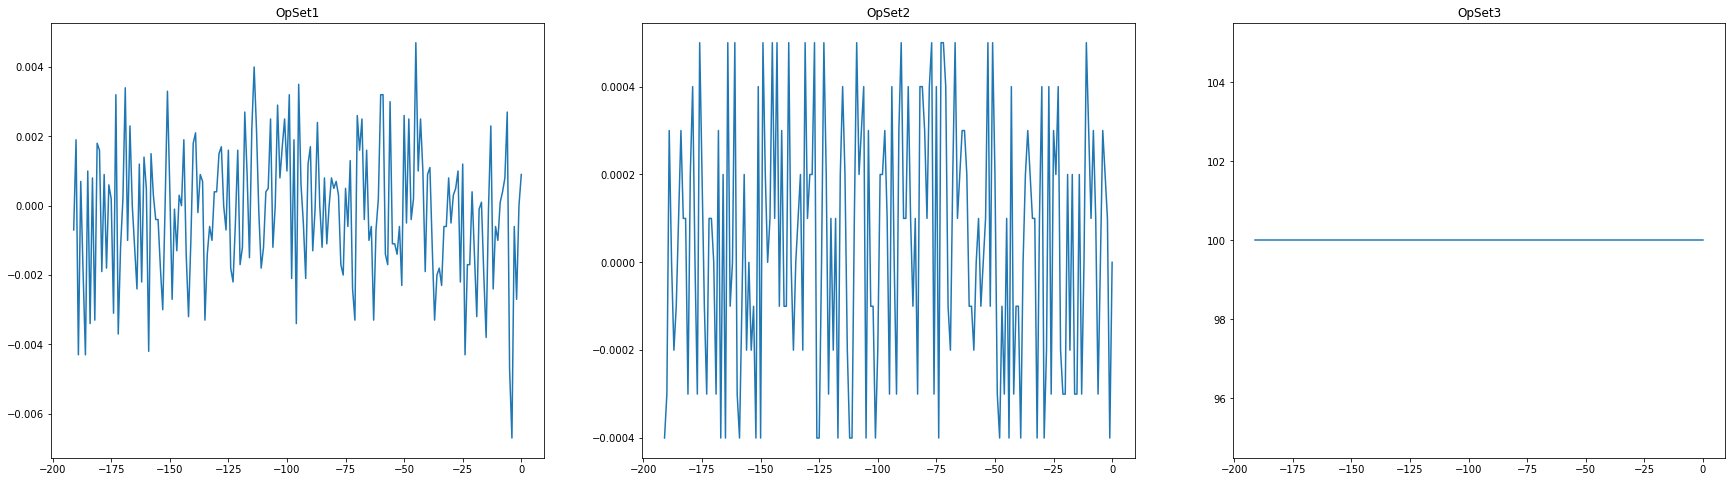

In [14]:
fig,ax=plt.subplots(1,3,figsize=(30,8),sharex='all')
for i in range(0,3):
    df_u1=train_df.query('Unit==1')
    ax[i].plot(df_u1.RUL_minus.values, df_u1['OpSet'+str(i+1)])
    ax[i].set_title('OpSet'+str(i+1))
#plt.savefig('Fig. 4.4 Operational setting of Unit = 1.png')

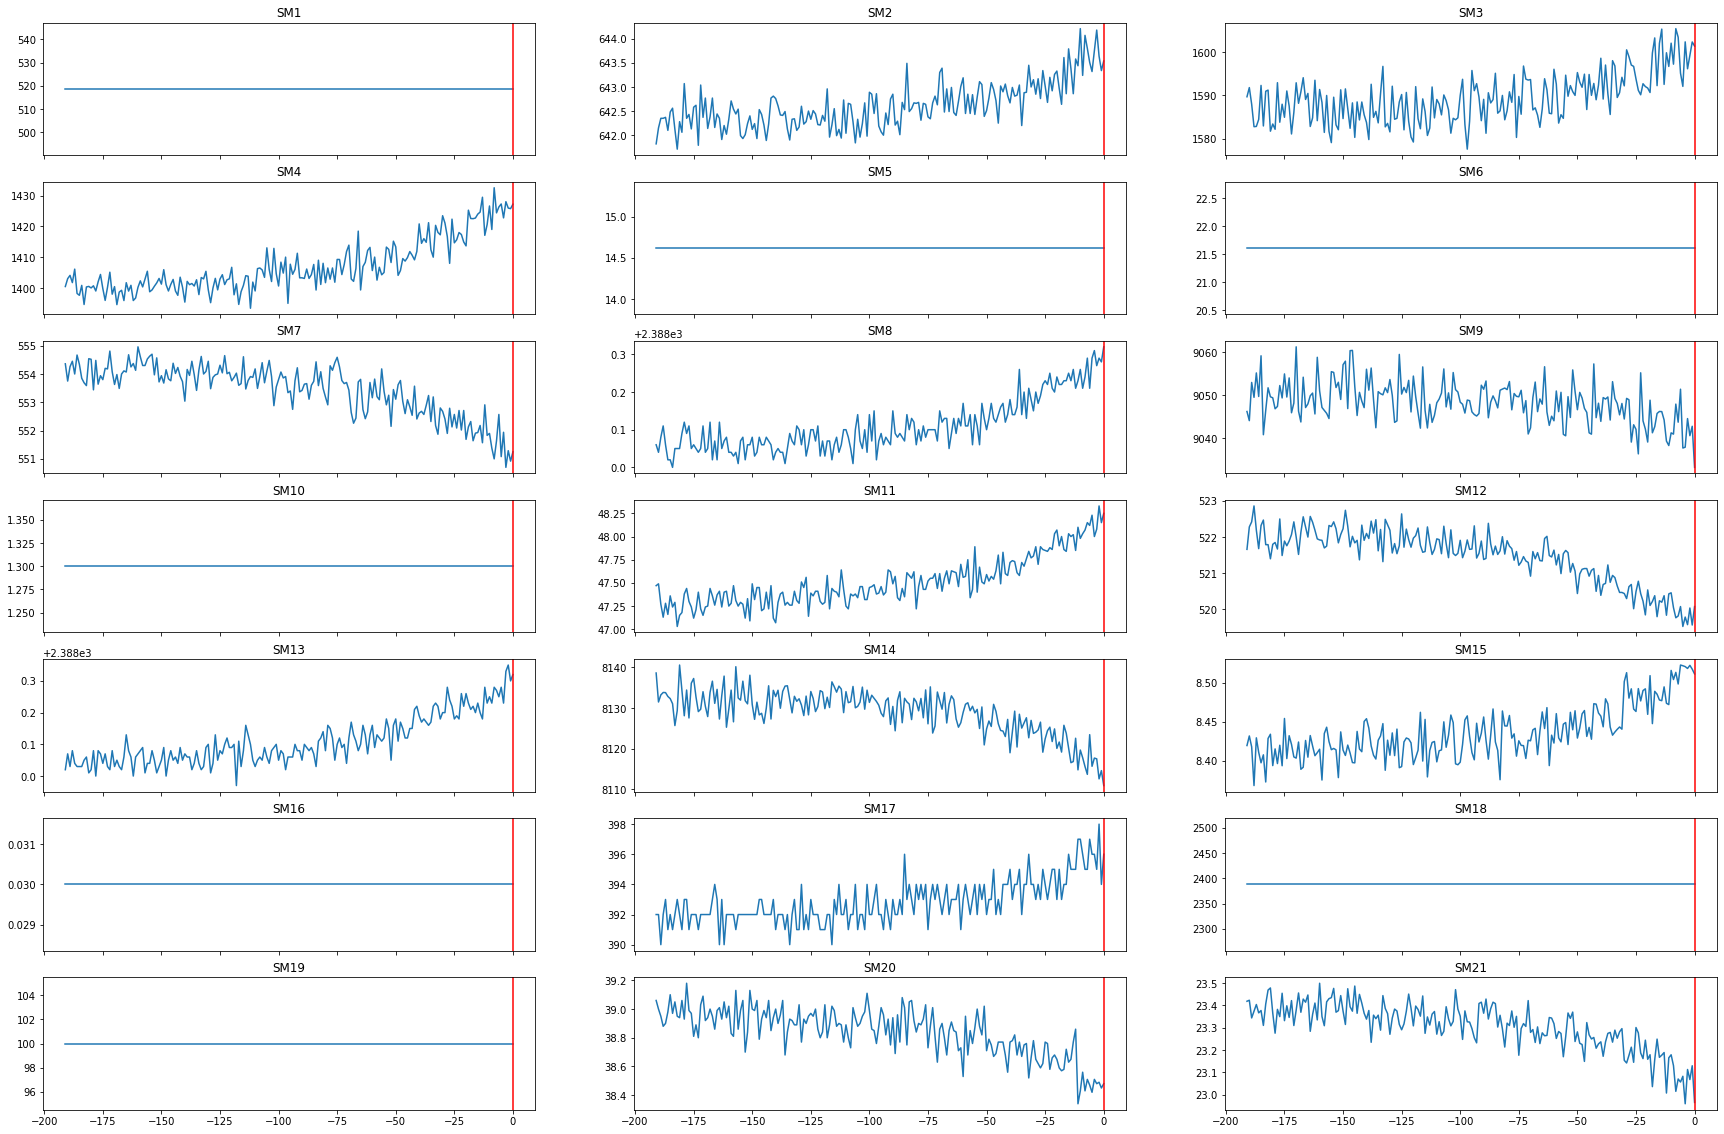

In [15]:
fig,ax=plt.subplots(7,3,figsize=(30,20),sharex=True)
df_u1=train_df.query('Unit==1')
c=0
for i in range(0,7):
    for j in range(0,3):
        ax[i,j].plot(df_u1.RUL_minus.values, df_u1['SM'+str(c+1)])
        ax[i,j].set_title('SM'+str(c+1))
        ax[i,j].axvline(0,c='r')
        c+=1
#plt.savefig('Fig. 4.5 Sensor Measurements of Unit = 1.png')

## 4.2.2 Data Cleaning

In [16]:
# if it's a larger dataset and the visualization takes too long can do this.
# % of missing.
for col in train_df.columns:
    pct_missing = np.mean(train_df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Unit - 0.0%
Cycle - 0.0%
OpSet1 - 0.0%
OpSet2 - 0.0%
OpSet3 - 0.0%
SM1 - 0.0%
SM2 - 0.0%
SM3 - 0.0%
SM4 - 0.0%
SM5 - 0.0%
SM6 - 0.0%
SM7 - 0.0%
SM8 - 0.0%
SM9 - 0.0%
SM10 - 0.0%
SM11 - 0.0%
SM12 - 0.0%
SM13 - 0.0%
SM14 - 0.0%
SM15 - 0.0%
SM16 - 0.0%
SM17 - 0.0%
SM18 - 0.0%
SM19 - 0.0%
SM20 - 0.0%
SM21 - 0.0%
RUL_minus - 0.0%


Perform an averaging with a floating average window of size 10 to smoothen out the signal noise

In [17]:
def rolling_mean_by_unit(df, n, verbose=False):
    cols_sensors = [c for c in df.columns if c.startswith('S') ]
    df_new = df.copy()
    unit_nrs = df['Unit'].unique()
    
    for nr in unit_nrs:
        if verbose:
            print('processing unit nr: {}'.format(nr))
        idx = df['Unit'] == nr
        df_new.loc[idx,cols_sensors] = df.loc[idx, cols_sensors].rolling(n, min_periods=1).mean()
    return df_new

train_df_smoothed = rolling_mean_by_unit(train_df, 10)

In [18]:
test_df_smoothed = rolling_mean_by_unit(test_df, 10)

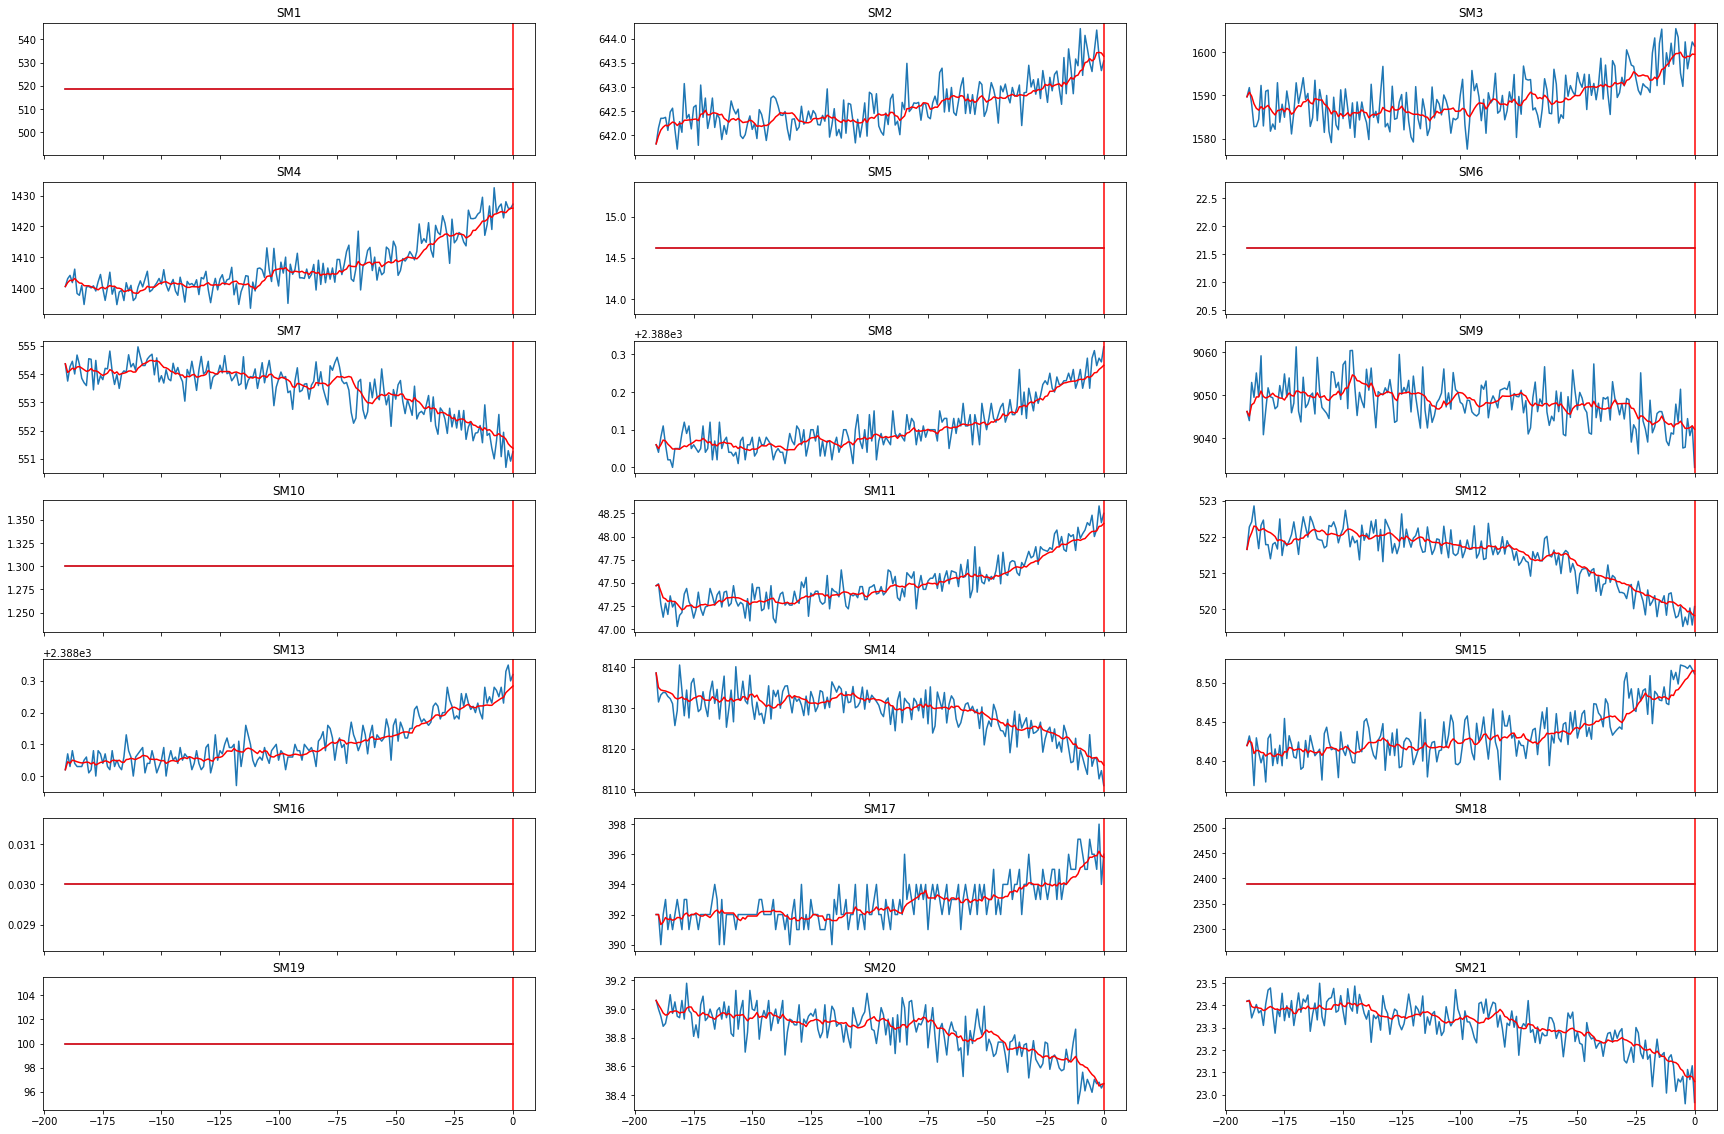

In [19]:
fig,ax=plt.subplots(7,3,figsize=(30,20),sharex=True)
df_u1=train_df.query('Unit==1')
df_u1_smoothed=train_df_smoothed.query('Unit==1')
c=0
for i in range(0,7):
    for j in range(0,3):
        ax[i,j].plot(df_u1.RUL_minus.values, df_u1['SM'+str(c+1)])
        ax[i,j].plot(df_u1_smoothed.RUL_minus.values, df_u1_smoothed['SM'+str(c+1)],color='r')
        ax[i,j].set_title('SM'+str(c+1))
        ax[i,j].axvline(0,c='r')
        c+=1
plt.savefig('Fig. 4.6 Sensor Measurements of Unit = 1 after smoothing.png')

## 4.2.3 Data Transform

In [20]:
features=list(train_df.columns[1:-1])
features

['Cycle',
 'OpSet1',
 'OpSet2',
 'OpSet3',
 'SM1',
 'SM2',
 'SM3',
 'SM4',
 'SM5',
 'SM6',
 'SM7',
 'SM8',
 'SM9',
 'SM10',
 'SM11',
 'SM12',
 'SM13',
 'SM14',
 'SM15',
 'SM16',
 'SM17',
 'SM18',
 'SM19',
 'SM20',
 'SM21']

In [21]:
minmax_scale = MinMaxScaler().fit_transform(train_df_smoothed[features])
train_df_smoothed[features] = pd.DataFrame(minmax_scale,columns=train_df_smoothed[features].columns)
train_df_smoothed.head()

,Unit,Cycle,OpSet1,OpSet2,OpSet3,SM1,SM2,SM3,SM4,SM5,...,SM13,SM14,SM15,SM16,SM17,SM18,SM19,SM20,SM21,RUL_minus
0,1,0.00000,0.459770,0.166667,0.0,0.0,0.154553,0.496532,0.306544,0.0,...,0.229008,0.202531,0.446312,0.0,0.281690,0.0,0.0,0.765101,0.767143,-191
1,1,0.00277,0.609195,0.250000,0.0,0.0,0.223475,0.528086,0.335992,0.0,...,0.292621,0.181095,0.477084,0.0,0.281690,0.0,0.0,0.731544,0.771764,-190
2,1,0.00554,0.252874,0.750000,0.0,0.0,0.274297,0.500600,0.354001,0.0,...,0.279898,0.177437,0.463991,0.0,0.187793,0.0,0.0,0.701715,0.720129,-189
3,1,0.00831,0.540230,0.500000,0.0,0.0,0.299708,0.448159,0.349499,0.0,...,0.305344,0.176510,0.395402,0.0,0.211268,0.0,0.0,0.667226,0.709230,-188
4,1,0.01108,0.390805,0.333333,0.0,0.0,0.316625,0.417051,0.366971,0.0,...,0.300254,0.175918,0.415491,0.0,0.253521,0.0,0.0,0.651007,0.714946,-187


In [22]:
minmax_scale = MinMaxScaler().fit_transform(test_df_smoothed[features])
test_df_smoothed[features] = pd.DataFrame(minmax_scale,columns=test_df_smoothed[features].columns)

## 4.2.4 Feature Selection

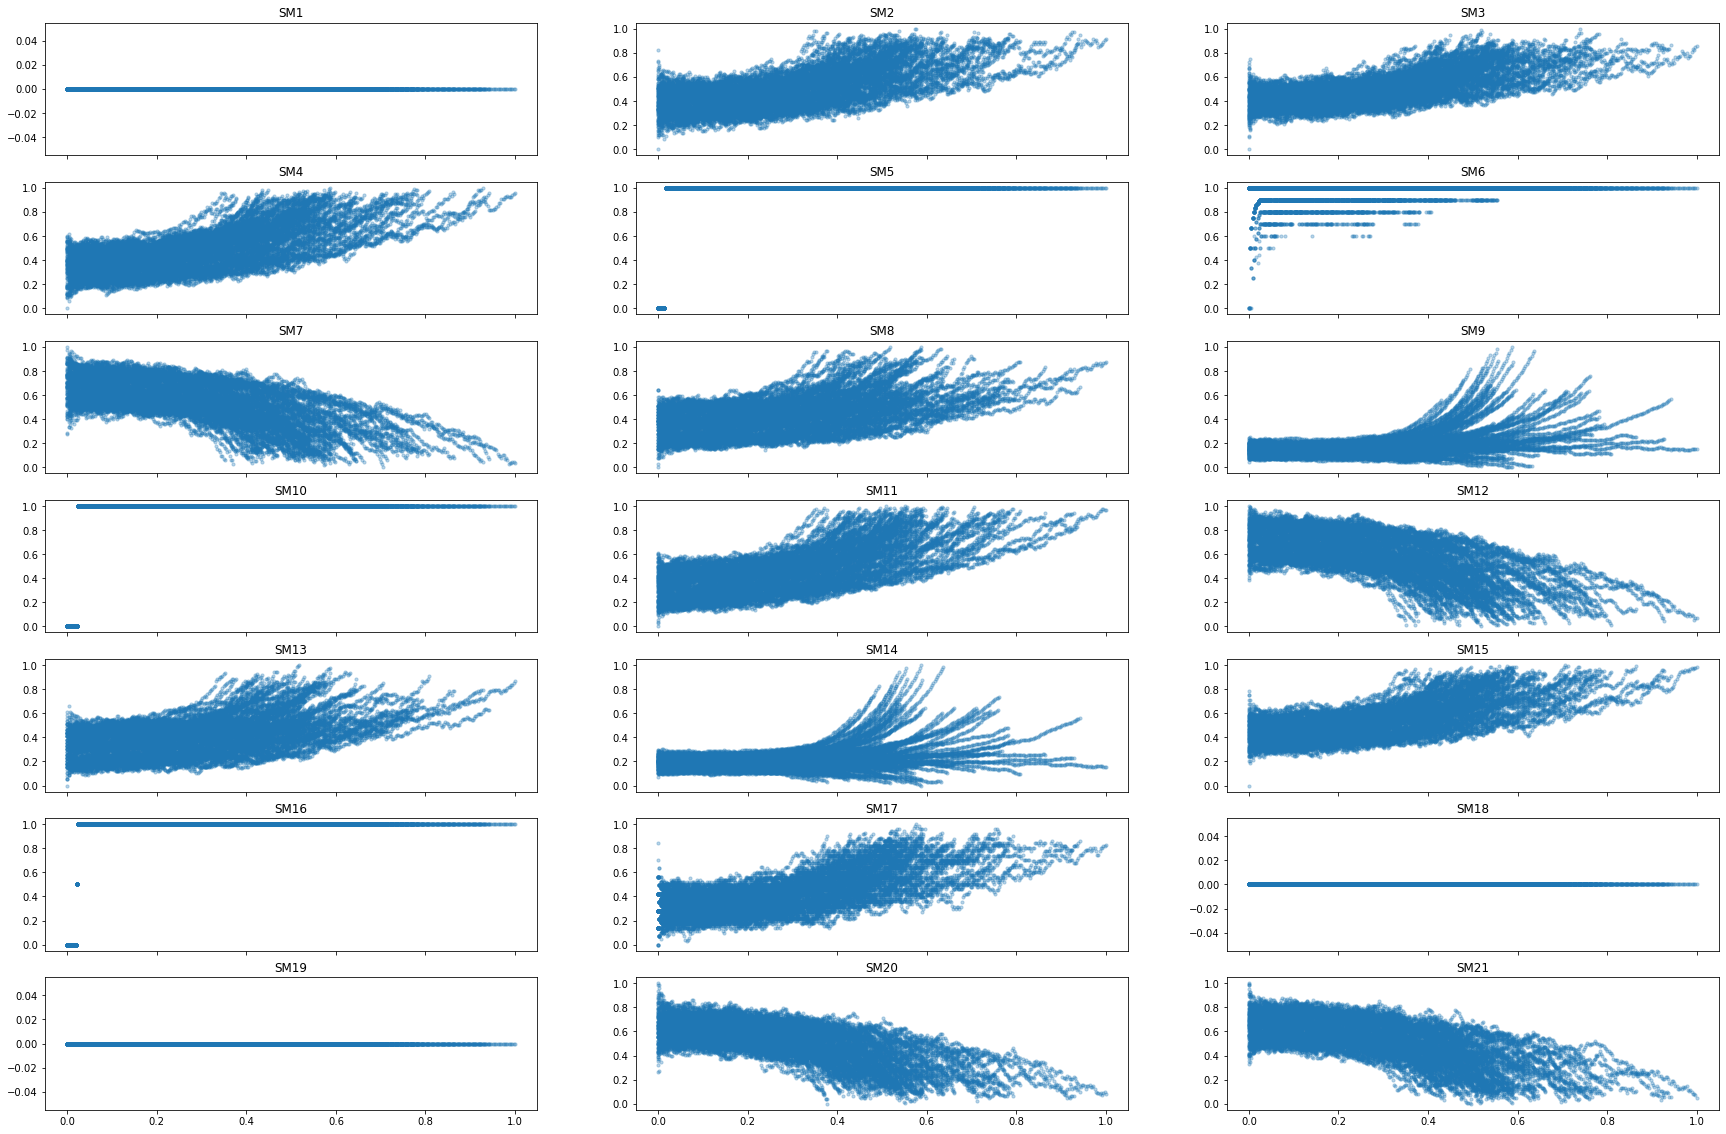

In [23]:
fig,ax=plt.subplots(7,3,figsize=(30,20),sharex=True)
c=0
for i in range(0,7):
    for j in range(0,3):
        ax[i,j].scatter(train_df_smoothed.Cycle.values, train_df_smoothed['SM'+str(c+1)],s=10,alpha=0.3)
        ax[i,j].set_title('SM'+str(c+1))
#         ax[i,j].axvline(0,c='r')
        c+=1
#plt.savefig('Fig. 4.8 Plots of Each Sensor Measurements.png')

In [48]:
X_train_prepared = train_df_smoothed.drop(['Unit','OpSet1','OpSet2','OpSet3','RUL_minus','SM1','SM5','SM6','SM9','SM10','SM14','SM16','SM17','SM18','SM19'],axis=1).values
y_train_prepared = train_df_smoothed['RUL_minus'].values
X_train = train_df.drop(['RUL_minus'],axis=1).values
y_train = train_df['RUL_minus'].values

In [49]:
X_test_prepared = test_df_smoothed.drop(['Unit','OpSet1','OpSet2','OpSet3','RUL_minus','SM1','SM5','SM6','SM9','SM10','SM14','SM16','SM17','SM18','SM19'],axis=1).values
y_test_prepared = test_df_smoothed['RUL_minus'].values
X_test = test_df.drop(['RUL_minus'],axis=1).values
y_test = test_df['RUL_minus'].values

# 4.3 Evaluation of Prognostics Models

In [51]:
X_prepared = pd.concat([pd.DataFrame(X_train_prepared),pd.DataFrame(X_test_prepared)]).values
y_prepared = pd.concat([pd.DataFrame(y_train_prepared),pd.DataFrame(y_test_prepared)]).values.ravel()

X_orignal = pd.concat([pd.DataFrame(X_train),pd.DataFrame(X_test)]).values
y_orignal = pd.concat([pd.DataFrame(y_train),pd.DataFrame(y_test)]).values.ravel()

gb = GradientBoostingRegressor(n_estimators=2000,learning_rate=0.01,max_depth=15,max_features='sqrt',min_samples_leaf=10,min_samples_split=10,loss='ls',random_state=42)
cv = KFold(n_splits=10, random_state=0,shuffle=True)
scores={'RMSE':[]}

for train_index, test_index in cv.split(X_prepared, y_prepared.ravel()):
        xtrain_prepared, xtest_prepared = X_prepared[train_index], X_prepared[test_index]
        ytrain_prepared, ytest_prepared = y_prepared[train_index], y_prepared[test_index]
        gb.fit(xtrain_prepared, ytrain_prepared)
        pred = gb.predict(xtest_prepared)
        scores['RMSE'].append(np.sqrt(mean_squared_error(ytest_prepared, pred)))

print('- RMSE for the prepared dataset: {}'.format(np.mean(scores['RMSE'])))
print()

gb = GradientBoostingRegressor(n_estimators=2000,learning_rate=0.01,max_depth=15,max_features='sqrt',min_samples_leaf=10,min_samples_split=10,loss='ls',random_state=42)
cv = KFold(n_splits=10, random_state=0,shuffle=True)
scores={'RMSE':[]}
for train_index, test_index in cv.split(X_orignal, y_orignal.ravel()):
        xtrain_orignal, xtest_orignal = X_orignal[train_index], X_orignal[test_index]
        ytrain_orignal, ytest_orignal = y_orignal[train_index], y_orignal[test_index]
        gb.fit(xtrain_orignal, ytrain_orignal)
        pred = gb.predict(xtest_orignal)
        scores['RMSE'].append(np.sqrt(mean_squared_error(ytest_orignal, pred)))
        
print('- RMSE for the original dataset: {}'.format(np.mean(scores['RMSE'])))

- RMSE for the prepared dataset: 22.99285481001074

- RMSE for the original dataset: 32.90809890633103


In [ ]:
importances = reg.feature_importances_
sorted_index=np.argsort(importances)[::-1]
x=range(len(importances))
labels=np.array(train_df_smoothed.drop(['Unit','RUL_minus'],axis=1).columns)[sorted_index]

plt.bar(x,importances[sorted_index],tick_label=labels)

plt.xticks(rotation=90)
plt.show()

In [98]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
cv = KFold(n_splits=5, random_state=0,shuffle=True)
scores={'RMSE':[]}

for train_index, test_index in cv.split(X_prepared, y_prepared.ravel()):
        xtrain_prepared, xtest_prepared = X_prepared[train_index], X_prepared[test_index]
        ytrain_prepared, ytest_prepared = y_prepared[train_index], y_prepared[test_index]
        lm.fit(xtrain_prepared, ytrain_prepared)
        pred = lm.predict(xtest_prepared)
        scores['RMSE'].append(np.sqrt(mean_squared_error(ytest_prepared, pred)))
        
print('RMSE of the 5 splits: {}'.format(scores['RMSE']))        
print('average RMSE: {}'.format(np.mean(scores['RMSE'])))  

RMSE of the 5 splits: [44.020185043326315, 43.42523938110857, 44.127080773870546, 44.55004125316785, 44.44045478446519]
average RMSE: 44.1126002471877


In [99]:
lm = LinearRegression()
cv = KFold(n_splits=5, random_state=0,shuffle=True)
scores={'RMSE':[]}
for train_index, test_index in cv.split(X_orignal, y_orignal.ravel()):
        xtrain_orignal, xtest_orignal = X_orignal[train_index], X_orignal[test_index]
        ytrain_orignal, ytest_orignal = y_orignal[train_index], y_orignal[test_index]
        lm.fit(xtrain_orignal, ytrain_orignal)
        pred = lm.predict(xtest_orignal)
        scores['RMSE'].append(np.sqrt(mean_squared_error(ytest_orignal, pred)))
        
print('RMSE of the 5 splits: {}'.format(scores['RMSE']))        
print('average RMSE: {}'.format(np.mean(scores['RMSE'])))  

RMSE of the 5 splits: [49.8212735747697, 49.616421558580626, 50.3513925654281, 50.763082312970056, 50.59236560096849]
average RMSE: 50.22890712254339


In [101]:
from sklearn.ensemble import RandomForestRegressor
m = RandomForestRegressor(max_depth=7,n_estimators=448,random_state=42)
cv = KFold(n_splits=5, random_state=0,shuffle=True)
scores={'RMSE':[]}

for train_index, test_index in cv.split(X_prepared, y_prepared.ravel()):
        xtrain_prepared, xtest_prepared = X_prepared[train_index], X_prepared[test_index]
        ytrain_prepared, ytest_prepared = y_prepared[train_index], y_prepared[test_index]
        m.fit(xtrain_prepared, ytrain_prepared)
        pred = m.predict(xtest_prepared)
        scores['RMSE'].append(np.sqrt(mean_squared_error(ytest_prepared, pred)))
        
print('RMSE of the 5 splits: {}'.format(scores['RMSE']))        
print('average RMSE: {}'.format(np.mean(scores['RMSE'])))  

RMSE of the 5 splits: [38.483450753273615, 37.89230305384763, 38.59596497520725, 39.01687273650861, 39.55822595300486]
average RMSE: 38.70936349436839


In [102]:
m = RandomForestRegressor(max_depth=7,n_estimators=448,random_state=42)
cv = KFold(n_splits=5, random_state=0,shuffle=True)
scores={'RMSE':[]}
for train_index, test_index in cv.split(X_orignal, y_orignal.ravel()):
        xtrain_orignal, xtest_orignal = X_orignal[train_index], X_orignal[test_index]
        ytrain_orignal, ytest_orignal = y_orignal[train_index], y_orignal[test_index]
        m.fit(xtrain_orignal, ytrain_orignal)
        pred = m.predict(xtest_orignal)
        scores['RMSE'].append(np.sqrt(mean_squared_error(ytest_orignal, pred)))
        
print('RMSE of the 5 splits: {}'.format(scores['RMSE']))        
print('average RMSE: {}'.format(np.mean(scores['RMSE'])))  

RMSE of the 5 splits: [43.20743511222215, 42.65084598460335, 43.44041468296463, 44.06399002689602, 44.2135290580973]
average RMSE: 43.51524297295669
